# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:10:39.004942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:10:41.926940
2025-04-14 19:10:41.926940


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:10:37"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

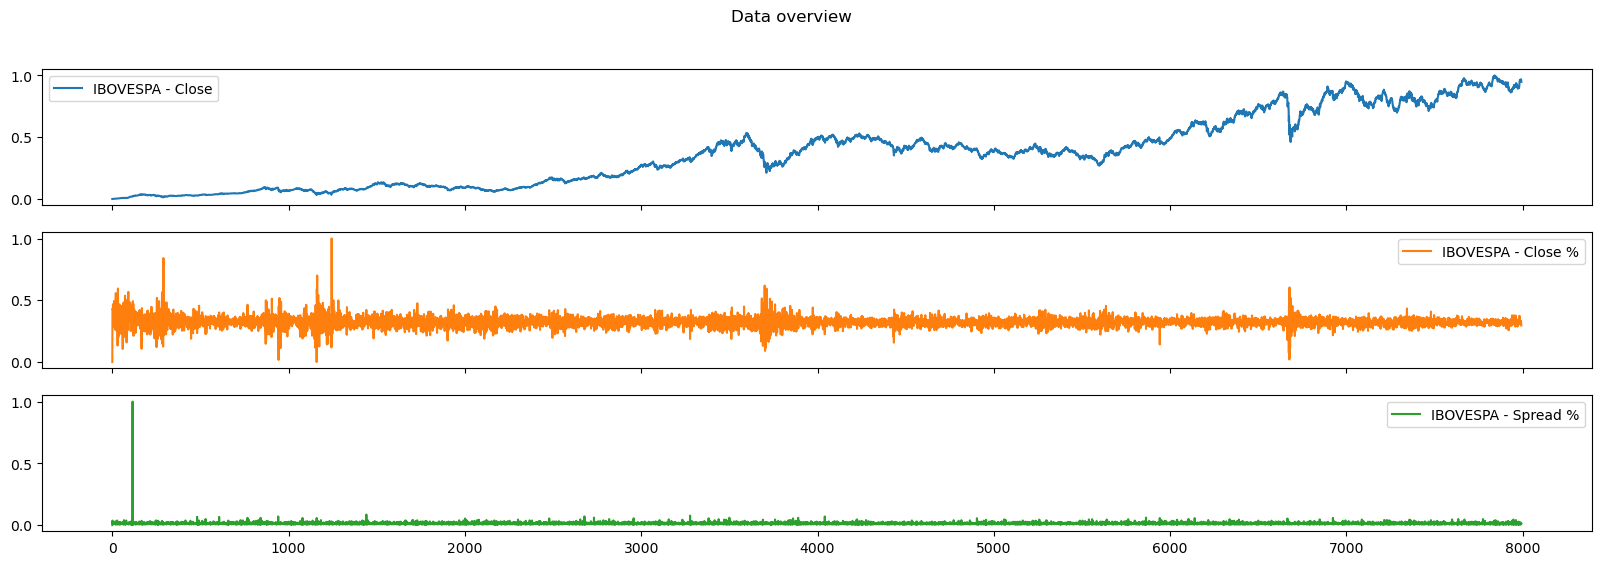

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

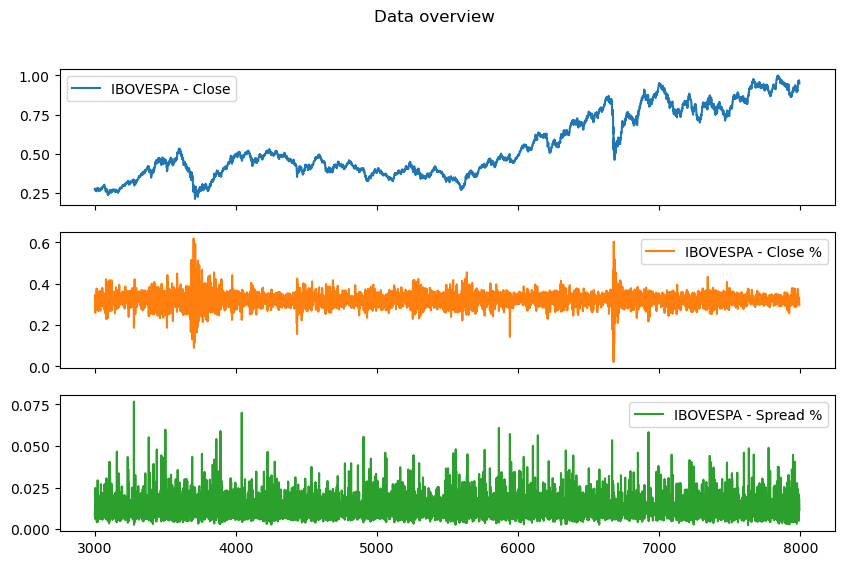

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

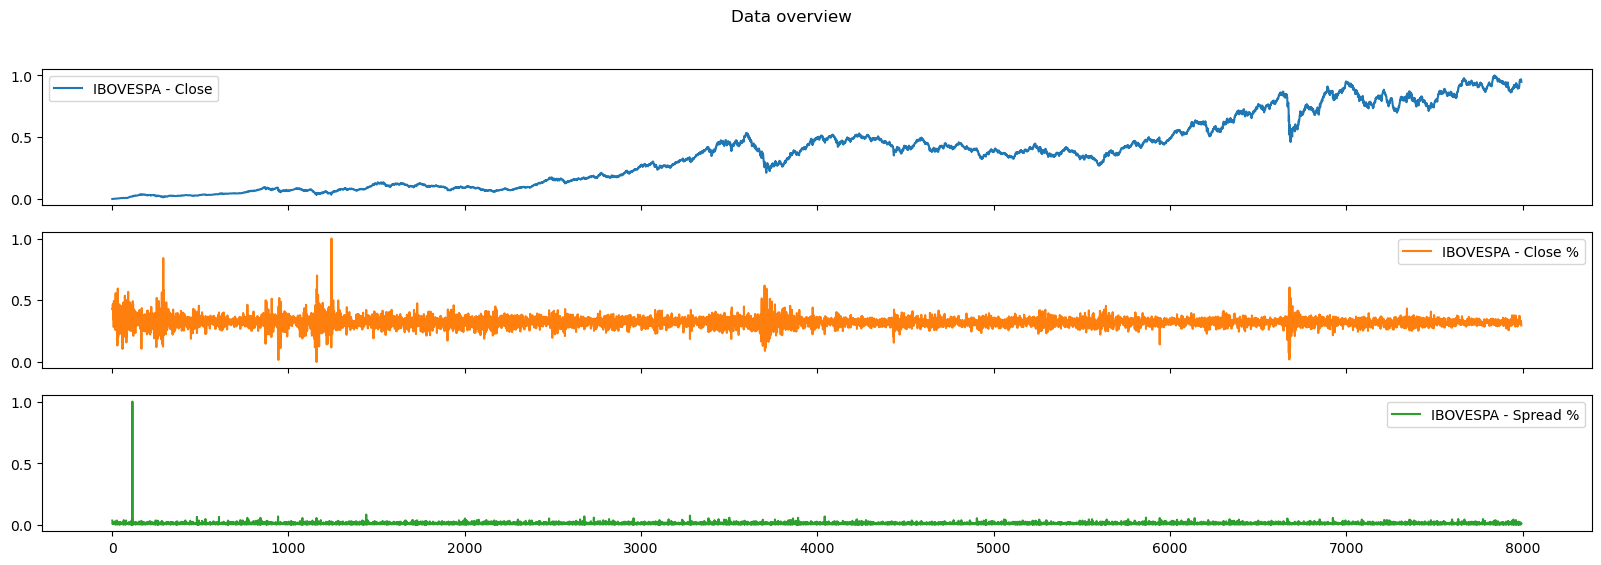

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

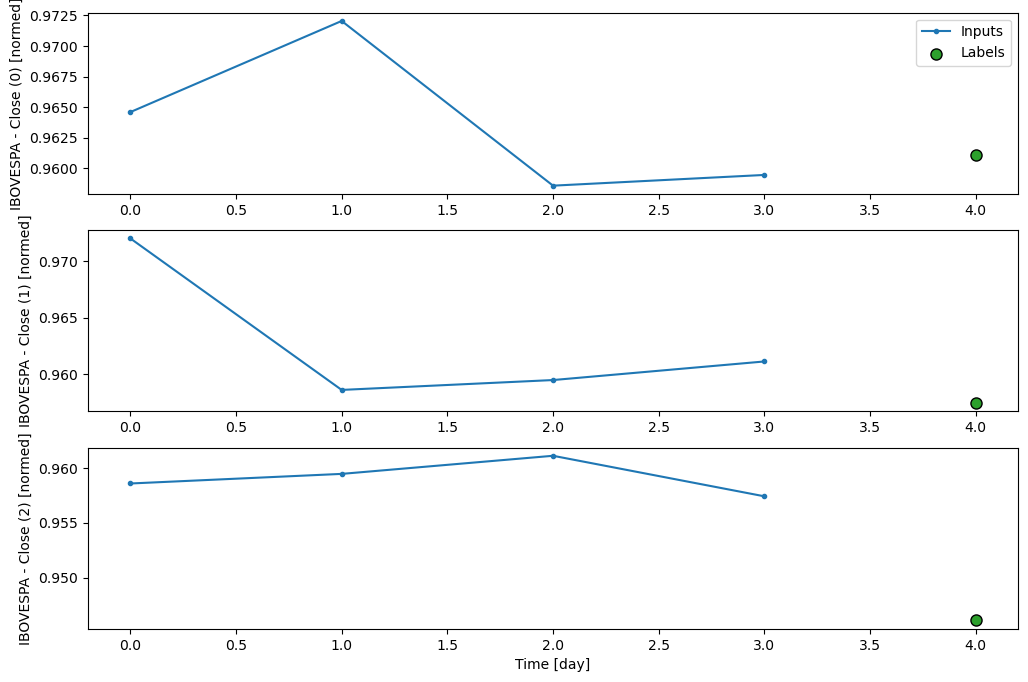

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

3

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15:04 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.0573 - mean_squared_error: 6.6062e-05 - root_mean_squared_error: 0.0077   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 54.0187 - mean_squared_error: 7.8491e-05 - root_mean_squared_error: 0.0086

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 46.5518 - mean_squared_error: 8.1858e-05 - root_mean_squared_error: 0.0088

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 42.1604 - mean_squared_error: 1.0113e-04 - root_mean_squared_error: 0.0098

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.3951 - mean_squared_error: 1.2736e-04 - root_mean_squared_error: 0.0108

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.2324 - mean_squared_error: 1.6539e-04 - root_mean_squared_error: 0.0122

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.4994 - mean_squared_error: 1.8601e-04 - root_mean_squared_error: 0.0130

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 33.9641 - mean_squared_error: 2.0286e-04 - root_mean_squared_error: 0.0136

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 32.8583 - mean_squared_error: 2.2295e-04 - root_mean_squared_error: 0.0142

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 31.8297 - mean_squared_error: 2.4122e-04 - root_mean_squared_error: 0.0148

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 30.9499 - mean_squared_error: 2.7610e-04 - root_mean_squared_error: 0.0157

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 30.1115 - mean_squared_error: 3.0760e-04 - root_mean_squared_error: 0.0166

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 29.3682 - mean_squared_error: 3.5588e-04 - root_mean_squared_error: 0.0176

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 28.7434 - mean_squared_error: 5.4004e-04 - root_mean_squared_error: 0.0202

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 28.3063 - mean_squared_error: 7.9489e-04 - root_mean_squared_error: 0.0232

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 27.8981 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0259    

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 27.5077 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0283

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 27.1405 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 26.7752 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0323

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 26.4270 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0339

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 26.1071 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0355

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 25.8011 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0369

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 25.5018 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0382

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 25.2225 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0397

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 24.9557 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0412


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 24.6920 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0425 - val_loss: 0.1837 - val_mean_absolute_error: 0.1837 - val_mean_absolute_percentage_error: 19.7268 - val_mean_squared_error: 0.0353 - val_root_mean_squared_error: 0.1878


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7283 - mean_absolute_error: 0.7283 - mean_absolute_percentage_error: 31398.5312 - mean_squared_error: 0.5304 - root_mean_squared_error: 0.7283

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6979 - mean_absolute_error: 0.6979 - mean_absolute_percentage_error: 13176.9385 - mean_squared_error: 0.4888 - root_mean_squared_error: 0.6987 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6417 - mean_absolute_error: 0.6417 - mean_absolute_percentage_error: 9311.9531 - mean_squared_error: 0.4276 - root_mean_squared_error: 0.6515 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5783 - mean_absolute_error: 0.5783 - mean_absolute_percentage_error: 7387.7603 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.6043

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 6182.7310 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5622

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - mean_absolute_percentage_error: 5271.3799 - mean_squared_error: 0.2882 - root_mean_squared_error: 0.5235

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 4616.4170 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4917

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 4120.3623 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4651

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 3730.4448 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4425

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 3443.5828 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4248

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 3201.8777 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4092

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 2995.1040 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3952

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 2815.9854 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3827

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 2659.2539 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3715

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 2506.4099 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3603

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 2384.5815 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3511

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 2275.2117 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3427

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 2176.3972 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3348

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 2077.1628 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3268

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1996.0297 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3200

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1921.6173 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3137

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1853.1160 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3078

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 1789.8260 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3024

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1731.1559 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2974

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1676.5940 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2927

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 1620.2479 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2878


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 1588.4106 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2850 - val_loss: 0.1108 - val_mean_absolute_error: 0.1108 - val_mean_absolute_percentage_error: 11.8343 - val_mean_squared_error: 0.0137 - val_root_mean_squared_error: 0.1169


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6920 - mean_absolute_error: 0.6920 - mean_absolute_percentage_error: 29829.9980 - mean_squared_error: 0.4788 - root_mean_squared_error: 0.6920

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6593 - mean_absolute_error: 0.6593 - mean_absolute_percentage_error: 12500.6455 - mean_squared_error: 0.4367 - root_mean_squared_error: 0.6603 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6025 - mean_absolute_error: 0.6025 - mean_absolute_percentage_error: 8818.1387 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.6106 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 6831.0303 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5564

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - mean_absolute_percentage_error: 5640.5645 - mean_squared_error: 0.2741 - root_mean_squared_error: 0.5122

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 4838.4473 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4768

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 4306.9385 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4505

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 3850.8242 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4260

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 3523.4392 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4072

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 3252.6467 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3907

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 3024.4697 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3762

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 2849.5508 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3646

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 2660.1248 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3516

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 2512.0437 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3411

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 2381.2070 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3316

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 2264.6350 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3229

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 2160.0322 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3148

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 2065.5857 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3074

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1979.8427 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3005

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1901.6161 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2941

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 1829.9419 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2881

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1763.9978 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2824

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1703.0941 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2772

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 1646.6648 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2722

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 1594.2240 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2676

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 1550.6077 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2638


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 1499.6599 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2592 - val_loss: 0.1021 - val_mean_absolute_error: 0.1021 - val_mean_absolute_percentage_error: 10.8905 - val_mean_squared_error: 0.0117 - val_root_mean_squared_error: 0.1082


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - mean_absolute_percentage_error: 21920.5723 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.5082

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 9200.0850 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4890  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 6516.2471 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4572

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 5047.2759 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.4166

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 4235.6538 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3861

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 3670.6538 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3611

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 3251.7122 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3405

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 2895.5159 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3213

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 2642.0034 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.3067

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 2433.5618 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2939

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 2258.7300 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2827

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 2109.7180 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2728

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1967.7755 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2629

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1856.9734 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2549

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1748.9940 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2469

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 1663.0210 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2403

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1585.8995 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2343

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 1516.2867 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2287

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1446.4404 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2229

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 1389.3781 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2181

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1337.0796 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2136

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1283.8361 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2090

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 1235.0653 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2046

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1198.8945 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2014

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 1164.9930 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.1983

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1129.2953 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1951


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1099.5337 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1924 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 3.1968 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0350


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 13908.7402 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.3223

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 5754.3818 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2940  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 3972.8237 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2586

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 3104.0437 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2318

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 2573.7893 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2117

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 2179.4849 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1947

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1923.9611 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1825

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1708.1748 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1714

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1555.5670 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1631

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1418.1980 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1553

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1315.7343 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1492

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1228.4344 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1438

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1153.0647 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1390

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1087.2839 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1347

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1029.3215 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1308

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 972.4333 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1270 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 926.8513 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1237

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 885.7463 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1208

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 848.4702 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1180

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 814.4960 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1155

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 783.3962 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1131

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 754.8068 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1109

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 728.4250 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1088

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 703.9974 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1069

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 681.3151 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1051

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 660.1927 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1035


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 640.4736 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1021 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205 - val_mean_absolute_percentage_error: 2.2174 - val_mean_squared_error: 6.8581e-04 - val_root_mean_squared_error: 0.0262


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 11771.6602 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2725

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 4868.9546 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2484  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 3252.1099 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2149

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 2564.7371 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1934

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 2100.3101 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1755

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1818.1801 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1633

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 1589.8854 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1525

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1432.9810 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1445

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1333.1940 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1392

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1225.9062 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1333

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1136.2883 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1283

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1060.1188 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1237

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 994.5000 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1197 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 931.4191 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1158

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 881.7811 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1126

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 837.6802 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1097

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 798.2018 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1071

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 758.8945 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1044

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 727.0040 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1021

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 694.8757 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0998

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 668.5438 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0979

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 641.7647 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0959

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 619.6094 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0943

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 599.0796 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0927

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 579.9975 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0913

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 562.2134 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0900


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 547.3890 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0889 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339 - val_mean_absolute_percentage_error: 3.6036 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0382


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 17705.6406 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.4104

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 7400.3081 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3894  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 5086.2441 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3606

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 4066.5349 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3331

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 3364.3965 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.3080

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 2930.5950 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2895

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 2606.0935 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2739

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 2353.1711 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2606

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 2129.5212 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2480

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1965.2369 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2381

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 1826.9622 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2294

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 1708.7664 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2216

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1606.4291 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2146

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 1516.8617 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2082

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1437.7747 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2025

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 1367.3450 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1973

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1304.1724 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1925

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 1247.1537 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1881

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 1195.4091 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1840

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 1148.2120 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1801

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1104.9772 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1766

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1069.4657 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1736

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1036.3911 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1708

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1001.7854 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1678

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 969.6551 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1650 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 939.7253 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1624

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 911.7662 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1600


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 902.8571 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1592 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239 - val_mean_absolute_percentage_error: 2.5572 - val_mean_squared_error: 8.0466e-04 - val_root_mean_squared_error: 0.0284


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 15731.3965 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3644

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 6565.8340 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3443  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 4496.9917 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.3158

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 3585.7935 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2901

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 2960.8704 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2672

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 2576.3906 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2506

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 2261.9480 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2354

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 2044.4330 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2239

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 1851.6064 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2130

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 1709.7015 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2045

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1590.1006 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1970

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1523 - mean_absolute_error: 0.1523 - mean_absolute_percentage_error: 1487.7524 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1903

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 1399.0527 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1842

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 1313.3119 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1782

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 1245.5216 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1732

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1178.7372 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1682

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1125.0576 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1641

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1076.5236 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1603

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1032.4026 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1567

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 992.1008 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1534 

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 955.1315 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1503

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 917.4620 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1471

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 886.2532 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1443

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 857.3021 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1418

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 830.3684 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1394

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 802.5527 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1369


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 789.4071 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1358 - val_loss: 0.0399 - val_mean_absolute_error: 0.0399 - val_mean_absolute_percentage_error: 4.2620 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0430


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 10148.6055 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2350

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 4192.8462 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2135  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 2910.5000 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1901

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 2337.2095 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1735

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1935.6466 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1594

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 1664.9639 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1484

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1507.0750 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1415

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 1347.7307 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1340

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1222.2582 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1277

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1120.3792 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1222

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 1035.8525 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1174

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 964.4302 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1132 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 896.9213 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1091

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 844.5464 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1057

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 798.5677 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1028

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 757.8567 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1001

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 721.5059 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0977

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 688.8297 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0955

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 659.2809 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0935

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 632.4227 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0916

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 607.8932 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0899

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 585.3922 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0882

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 564.6627 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0867

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 545.4966 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0853

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 527.7205 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0840

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 511.1890 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0829

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 494.1165 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 486.0481 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0812 - val_loss: 0.0150 - val_mean_absolute_error: 0.0150 - val_mean_absolute_percentage_error: 1.6447 - val_mean_squared_error: 3.9758e-04 - val_root_mean_squared_error: 0.0199


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 14060.5205 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3256

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 5864.3208 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.3070  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 4137.3735 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2842

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 3202.9409 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2588

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 2692.2048 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2407

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 2336.8406 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2257

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 2073.0063 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2133

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 1868.3079 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.2028

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 1704.2789 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1937

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 1583.3359 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1867

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1480.1656 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1803

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1370.4948 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1733

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1286.1570 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1677

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1212.5999 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1626

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1147.8120 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1580

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1090.2615 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1537

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1038.7615 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1498

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 992.3773 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1462 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 954.8300 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1433

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 920.2952 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1405

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 880.8212 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1372

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 848.3596 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1345

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 818.4337 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1319

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 790.7480 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1295

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 762.3149 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1270

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 738.5909 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1249

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 714.0739 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1227


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 707.0706 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1221 - val_loss: 0.0393 - val_mean_absolute_error: 0.0393 - val_mean_absolute_percentage_error: 4.1861 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0423


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 8973.4199 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2076

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 3698.0134 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1873 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 2562.5776 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1660

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 2009.5956 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1500

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1672.6763 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1382

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1442.9991 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1289

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1258.8958 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1207

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1133.2914 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1147

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1032.9130 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1095

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 950.5887 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1050 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 874.7495 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1007

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 817.1569 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0973

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 762.3148 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0939

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 719.5331 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0912

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 677.8747 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0885

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 644.7053 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0864

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 614.9453 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0844

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 588.0770 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0825

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 561.1116 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0806

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 539.0774 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 516.7361 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 498.3091 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 481.2796 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 465.4903 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 449.2442 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 435.6618 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0713


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 427.1045 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0706 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271 - val_mean_absolute_percentage_error: 3.0044 - val_mean_squared_error: 9.9323e-04 - val_root_mean_squared_error: 0.0315


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 10273.5254 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2378

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 4262.9321 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2197  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 3081.0186 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.2018

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 2522.4946 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1868

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1594 - mean_absolute_error: 0.1594 - mean_absolute_percentage_error: 2070.3499 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1716

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1769.8823 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1596

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1553.4966 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1498

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1373.1875 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1409

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1246.6973 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1342

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1143.9713 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1284

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 1058.6244 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1234

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 986.3739 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1190 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 917.9441 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1147

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 864.7771 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1111

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 818.0397 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1080

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 776.5974 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1051

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 735.6862 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1022

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 702.7362 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0998

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 672.8914 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0976

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 645.7191 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0955

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 618.2335 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0933

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 595.6132 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0915

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 574.7464 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0898

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 555.4304 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0882

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 535.5860 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0865

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 519.0212 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0852

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 501.8947 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0838


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 500.2531 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0836 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 3.5946 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0364


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 7663.5532 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1771

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 3145.0933 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1576 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 2168.3171 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1382

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1660.1511 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1235

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1387.9741 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1140

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1201.2770 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1066

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 1063.7244 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1006

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 947.3344 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0952 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 864.5436 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0910

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 796.5414 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0874

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 739.5307 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0842

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 690.9479 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0814

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 648.9776 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0788

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 612.3112 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0765

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 579.9881 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 554.2825 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 545.2830 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 539.4614 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 533.7765 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 525.4945 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0709

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 520.1299 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 514.8856 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 509.7572 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 504.7412 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 492.6675 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 485.7257 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 468.2333 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 450.1499 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 433.5508 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0643

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 418.2512 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 404.0987 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 390.9667 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 378.7477 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 367.3468 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 361.3378 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0588 - val_loss: 0.0387 - val_mean_absolute_error: 0.0387 - val_mean_absolute_percentage_error: 4.1422 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0410


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 9530.2598 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2205

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 3943.3838 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.2020 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 2756.3694 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1828

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 2120.5032 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1646

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1777.3583 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1525

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1540.5935 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1428

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1365.5004 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1350

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1230.0516 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1283

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1121.6877 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1226

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1032.8557 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1177

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 958.4677 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1133 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 895.1326 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1094

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 834.8430 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1056

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 787.8047 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1025

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 742.0229 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0994

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 705.5991 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0969

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 672.9390 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0947

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 643.4674 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0926

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 616.7239 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0906

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 592.3347 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0888

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 572.3868 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0873

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 551.6578 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0857

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 532.5232 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 514.8016 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0828

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 496.5812 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0813

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 481.3638 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801


Epoch: 14 - LR: 0.007039405405521393


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 465.6261 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0789 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7868 - val_mean_squared_error: 4.1245e-04 - val_root_mean_squared_error: 0.0203


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 10874.9648 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2514

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 4514.0825 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2336  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 3166.1331 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2132

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 2440.0713 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1925

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 2046.4805 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1784

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 1774.2231 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1670

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 1553.4269 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1568

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1401.4349 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1491

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1279.4192 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1424

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1179.1185 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1367

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 1094.9446 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1316

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1023.1401 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1270

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 961.0784 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1230 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 906.8413 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1193

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 858.9868 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1160

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 816.4152 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1129

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 774.2780 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1098

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 740.2650 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1072

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 709.3986 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1048

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 681.2479 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1025

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 655.4581 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1004

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 631.7338 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0985

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 607.4979 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0964

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 587.3729 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0947

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 568.6695 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0931

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 551.2394 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0916


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 534.9547 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0902 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_absolute_percentage_error: 3.3831 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0346


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 7162.9473 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1656

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 2937.8303 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1468 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 2170.5242 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1327

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1964.6750 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1273

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 1800.0869 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1227

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 1624.8478 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1173

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1424.3828 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1106

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 1210.8586 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1025

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1073.9564 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0968 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 992.1951 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0931 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 945.1313 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 883.3176 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0880

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 838.3377 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0858

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 790.7250 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0833

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 742.3207 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0807 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 700.1291 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0783

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 668.0048 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0765

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 639.0146 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0748

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 616.9166 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 588.6934 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 559.7830 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0699

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 536.9690 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 516.1319 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 497.0131 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 479.4023 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 460.8945 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 445.9501 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 430.1331 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 419.0618 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0606

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 405.2457 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 392.4017 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0587

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 381.8800 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 371.9637 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 362.6028 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 352.5263 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 343.0549 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 336.3168 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547 - val_loss: 0.0159 - val_mean_absolute_error: 0.0159 - val_mean_absolute_percentage_error: 1.7614 - val_mean_squared_error: 3.7891e-04 - val_root_mean_squared_error: 0.0195


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 8420.2822 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1946

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 3679.2209 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1799 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 2593.8569 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1641

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 2049.6885 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1496

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1749.3148 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1398

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1508.2045 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1306

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1351.4945 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1240

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1227.5391 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1183

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1113.8114 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1127

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 1065.4052 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1103

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 981.5080 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1058 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 919.3813 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1023

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 858.3552 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0987

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 811.9072 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0959

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 765.2318 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0930

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 729.0203 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0907

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 692.0341 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0882

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 670.9635 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0868

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 640.0656 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0847

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 612.1701 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0828

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 589.8813 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0812

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 575.0299 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0801

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 558.2648 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0789

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 537.5221 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0773

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 520.7197 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0760

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 502.8832 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 488.3470 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 472.8290 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 458.3609 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 448.1342 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 438.4003 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0694

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 426.1276 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0684

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 415.9963 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0676


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 405.0530 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0667 - val_loss: 0.0384 - val_mean_absolute_error: 0.0384 - val_mean_absolute_percentage_error: 4.0972 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0408


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 7663.7183 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1772

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 3153.5203 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1591  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 2188.4548 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1415

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1678.9430 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1269

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1405.3405 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1175

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1217.2251 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1101

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1078.2996 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1040

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 960.4569 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0983 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 876.5823 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0940

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 800.7527 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0899

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 755.8391 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0873

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 710.9307 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0846

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 667.0174 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0819

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 628.7450 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0795

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 595.0762 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 565.1962 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0754

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 541.2969 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0738

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 519.5381 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0723

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 499.6328 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0709

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 483.5506 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 466.5193 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 452.6718 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0674

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 437.9214 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 424.1968 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 412.9436 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 405.3010 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0638

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 399.4099 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0633

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 390.9213 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 380.2071 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0618

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 370.1235 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 366.4955 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279 - val_mean_absolute_percentage_error: 2.9687 - val_mean_squared_error: 9.2066e-04 - val_root_mean_squared_error: 0.0303


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 8013.1499 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1850

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 3708.3083 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1711 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 2741.9685 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1590

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 2221.0466 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1472

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1932.1870 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1389

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1682.0990 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1308

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1495.7552 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1241

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1310.4464 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1167

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1218.8623 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1128

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 1126.4739 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1086

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 1025.4523 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1038

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 943.0729 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0997 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 882.4972 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0966

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 830.1788 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0938

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 772.3185 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0906

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 722.8030 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0878

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 675.4460 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0849

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 638.3704 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0826

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 612.5339 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0810

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 582.5444 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0791

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 555.6424 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0773

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 531.3585 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0756

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 509.3145 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0740

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 489.2065 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0726

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 470.7833 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 453.8342 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0699

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 438.1816 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 423.6773 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 410.1985 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 396.2942 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 384.6444 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218 - val_mean_absolute_percentage_error: 2.3161 - val_mean_squared_error: 5.8560e-04 - val_root_mean_squared_error: 0.0242


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:34s:838ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:11:21.049519: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:10:37',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:34s:838ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:11:21.262969: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 7574.3452 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1749

 16/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 2475.3235 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1624 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 1726.6992 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1570

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 1389.7931 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1523

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 1192.5996 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1483

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 1052.9824 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1449

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 948.5289 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1419 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 883.2589 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1397

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 817.2737 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1368

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 757.2471 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1338

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 710.0187 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1310

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 668.9608 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1282

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 630.0984 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1254

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 598.4740 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1230

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 563.6352 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1201

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 536.9212 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1177

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 509.4110 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1152

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 484.8773 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1127

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 465.6570 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1108


Loss: 0.054415252059698105 - MAE: 0.054415252059698105 - MSE: 0.005744036752730608 - MAPE: 128.96157836914062 - RMSE: 0.0757894217967987


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 1.2933 - mean_squared_error: 1.8227e-04 - root_mean_squared_error: 0.0135

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 2.1059 - mean_squared_error: 4.8802e-04 - root_mean_squared_error: 0.0219 


Loss: 0.021750127896666527 - MAE: 0.021750127896666527 - MSE: 0.0005855986382812262 - MAPE: 2.316145420074463 - RMSE: 0.024199144914746284


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 2.5895 - mean_squared_error: 6.3537e-04 - root_mean_squared_error: 0.0252

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 2.1628 - mean_squared_error: 5.0104e-04 - root_mean_squared_error: 0.0223


Loss: 0.019316915422677994 - MAE: 0.019316915422677994 - MSE: 0.00048098081606440246 - MAPE: 2.0754873752593994 - RMSE: 0.021931275725364685


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

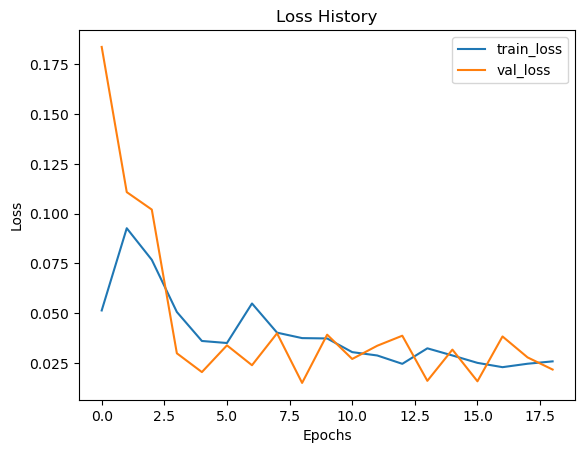

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

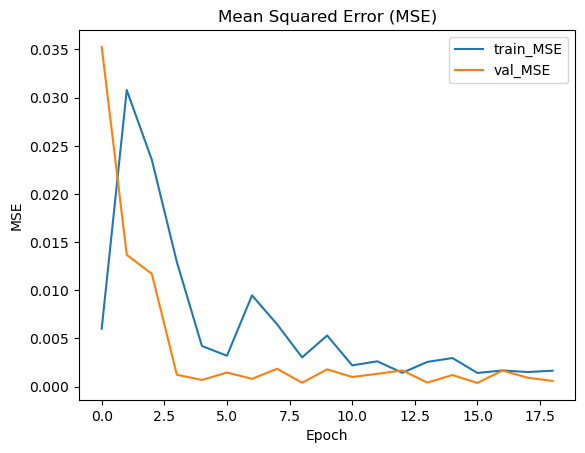

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

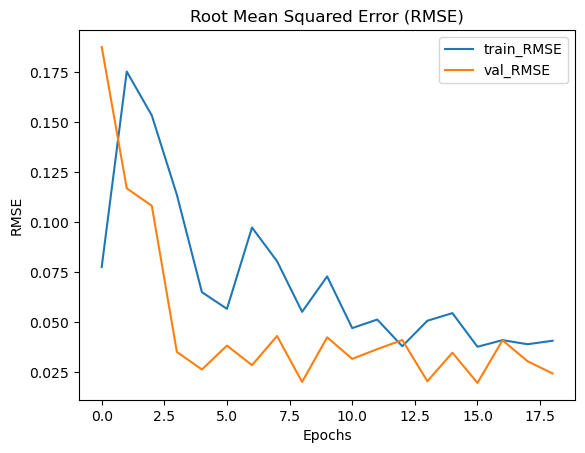

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

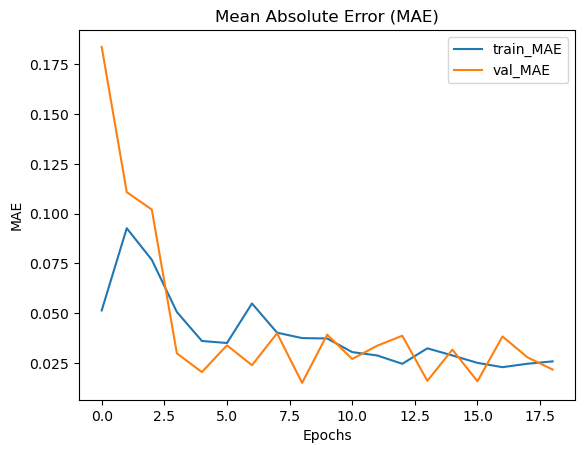

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

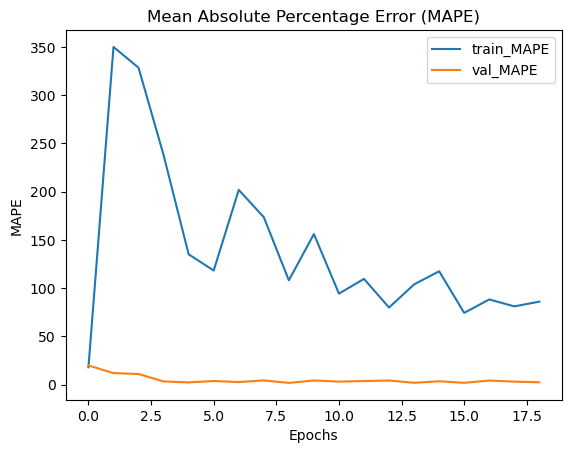

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:11:25.036418: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


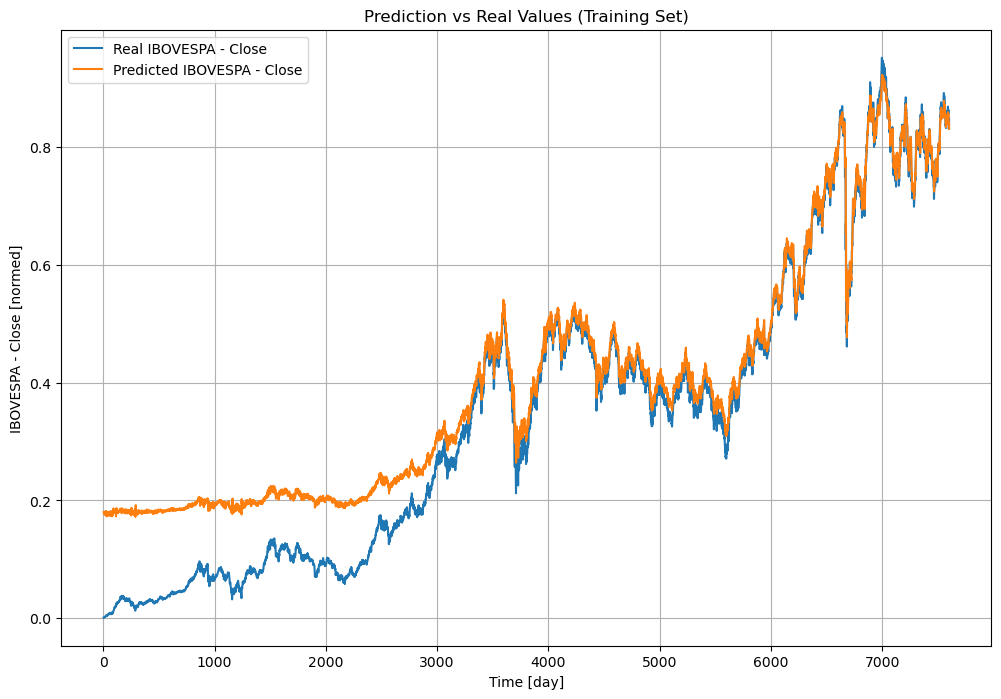

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


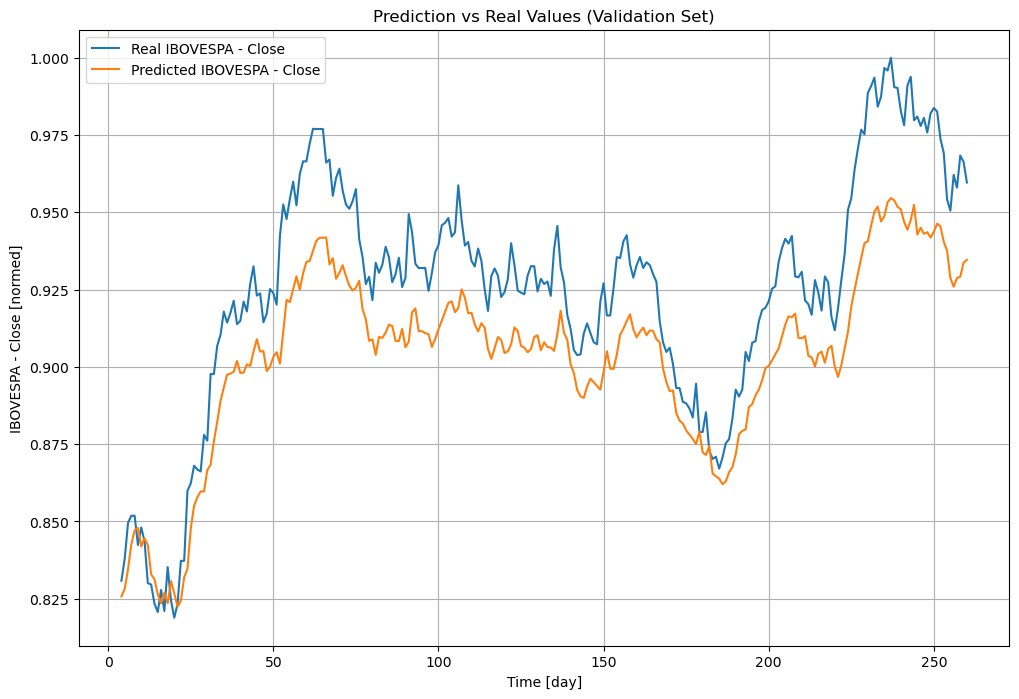

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


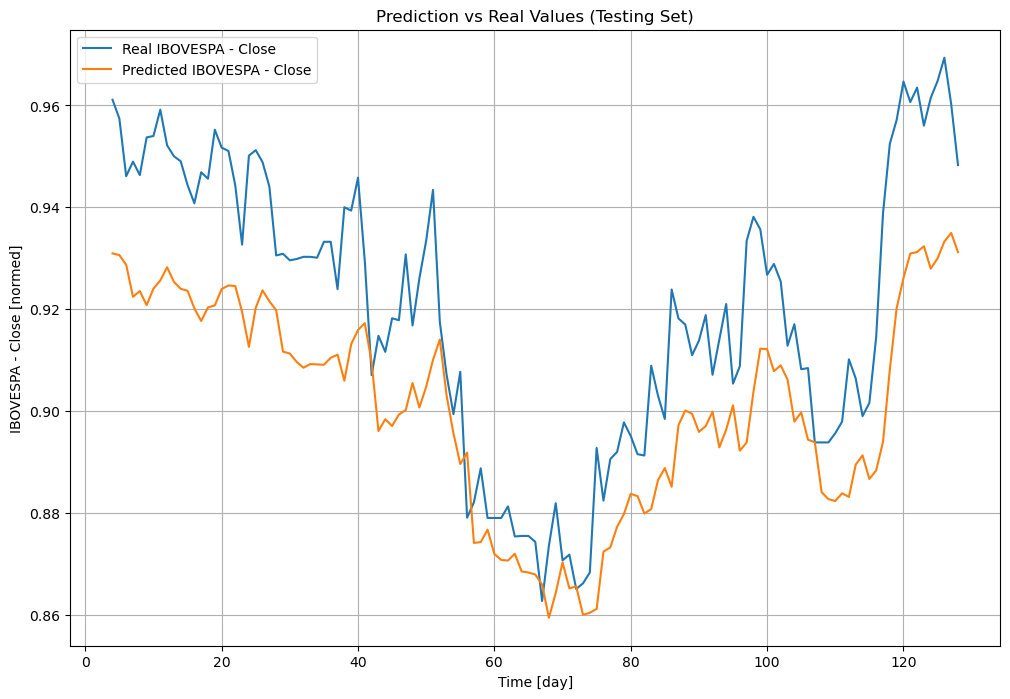

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

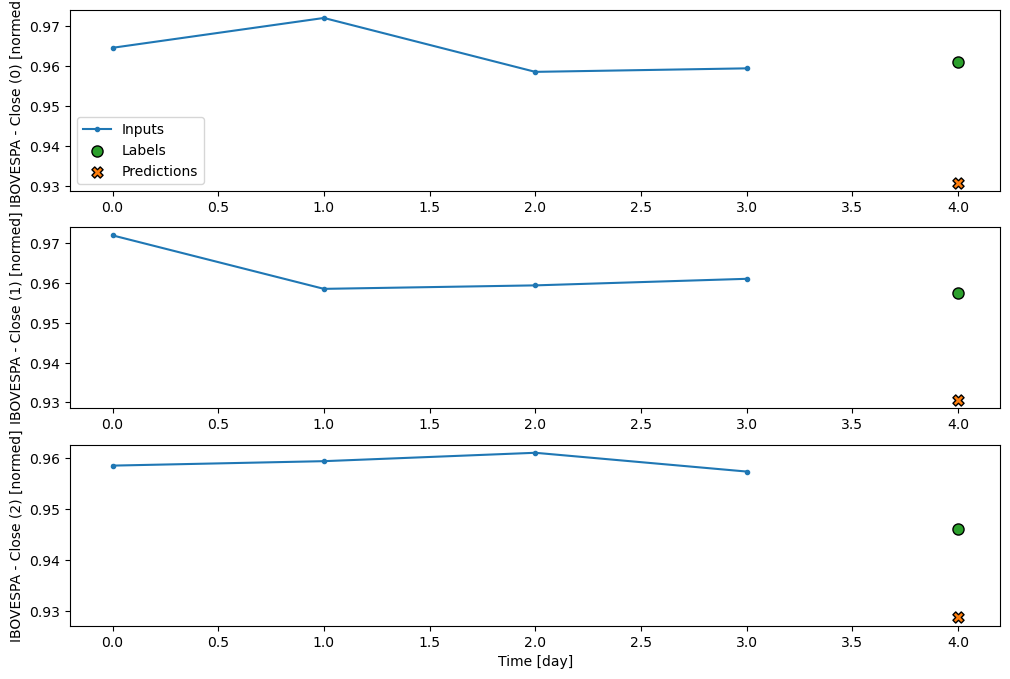

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:46s:640ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


array([[[0.9309276 , 0.9309276 , 0.9309276 , ..., 0.9309276 ,
         0.9309276 , 0.9309276 ]],

       [[0.9306072 , 0.9306072 , 0.9306072 , ..., 0.9306072 ,
         0.9306072 , 0.9306072 ]],

       [[0.92869484, 0.92869484, 0.92869484, ..., 0.92869484,
         0.92869484, 0.92869484]],

       ...,

       [[0.9332637 , 0.9332637 , 0.9332637 , ..., 0.9332637 ,
         0.9332637 , 0.9332637 ]],

       [[0.9349531 , 0.9349531 , 0.9349531 , ..., 0.9349531 ,
         0.9349531 , 0.9349531 ]],

       [[0.93116814, 0.93116814, 0.93116814, ..., 0.93116814,
         0.93116814, 0.93116814]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')